In [1]:
## To Fix the seeds (random number generators) and obtian reproducible results

import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(1)

import random
import sklearn
import warnings
import numpy as np
import pandas as pd
from math import sqrt
import seaborn as sns
import tensorflow as tf
from keras import models
from keras import layers
from sklearn import metrics
import tensorflow.keras.layers 
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
import tensorflow.keras as keras
warnings.filterwarnings('ignore') 
from sklearn import preprocessing
from keras.models import Sequential
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   random.seed(1)

In [2]:
# Do not modify Config

PhyD_Names = ['N', 'infa_C_Au', 'infa_S_Mg', 'infa_S_O', 'cc', 'cs_Mg', 'cs_O', 
             'ave_GCN', 'csDist_Mg', 'csDist_O', 'Zdist', 'Ecoh', 'Eadh', 'Eb', 'Etot']
PhyD = np.loadtxt('C:\\Users\\c2074370\\1-projects\\Raw_Phys_Descrip.txt', delimiter=',', dtype=float)
    
Config = np.concatenate((np.repeat('1Au',104), np.repeat('2Au',104), np.repeat('3Au',105), 
                         np.repeat('4Au_a',102), np.repeat('4Au_b',45), np.repeat('4Au_c',103), 
                         np.repeat('4Au_d',104), np.repeat('4Au_e',105), np.repeat('4Au_f',96), 
                         np.repeat('5Au_a',103), np.repeat('5Au_b',103), np.repeat('5Au_c',103),
                         np.repeat('5Au_d',104), np.repeat('5AU_e',102),
                         np.repeat('6Au_a',105), np.repeat('6Au_b',105), 
                         np.repeat('9Au_a',99), np.repeat('9Au_b',79), 
                         np.repeat('12Au_a',12), 
                         np.repeat('24Au_b',56)))

Cl_XYZ = pd.DataFrame.to_numpy( pd.read_csv('C:\\Users\\c2074370\\1-projects\\Cluster_XYZ.csv', header=None, names=range(3*24)) )

Nobs = PhyD.shape[0]

In [3]:
# Recall: in python, numbering start from 0 (and from 1 in R) 
entry_nb = 388 

N_atom = int(PhyD[entry_nb,0])
 
Mat_XYZ = (Cl_XYZ[entry_nb, :(3*N_atom)]).reshape((N_atom, 3))

print('Entry number %s\n' % (entry_nb))

for i in range(15):
    print('%s = %s' % (PhyD_Names[i], PhyD[entry_nb,i]))

print('Config = %s' % Config[entry_nb])
    
print('\n')
print('Atomic coordinates (rows are the coordinates of each atom):\n')
print(Mat_XYZ)

Entry number 388

N = 4.0
infa_C_Au = 0.0
infa_S_Mg = 0.0
infa_S_O = 0.0
cc = 2.5
cs_Mg = 0.0
cs_O = 0.0
ave_GCN = 3.513
csDist_Mg = 3.645
csDist_O = 0.828
Zdist = 0.542
Ecoh = -1.544
Eadh = -1.658
Eb = -1.959
Etot = -376.473
Config = 4Au_a


Atomic coordinates (rows are the coordinates of each atom):

[[2.11303 2.11303 9.68736]
 [4.74258 1.37078 9.68736]
 [1.37078 4.74258 9.68736]
 [3.99494 3.99494 9.68736]]


In [4]:
# Indices for N=4

Ind_4Au = np.array(range(Nobs))[PhyD[:,0]==4]
print(Ind_4Au.shape)

(555,)


In [5]:
# Atomic coordinates for N=4

Au4_XYZ = (Cl_XYZ[Ind_4Au, :(3*N_atom)])
print(Au4_XYZ.shape)

(555, 12)


In [6]:
# Etot for N=4

Au4_Etot = PhyD[Ind_4Au,14]
print(Au4_Etot.shape)

(555,)


In [7]:
scaler_x=StandardScaler()
Au4_XYZ_scaled=scaler_x.fit(Au4_XYZ)
Au4_XYZ_scaled=scaler_x.transform(Au4_XYZ)



scaler_y=StandardScaler()
Au4_Etot=Au4_Etot.reshape(-1,1)
Au4_Etot_scaled=scaler_y.fit(Au4_Etot)
Au4_Etot_scaled=scaler_y.transform(Au4_Etot)

In [8]:
reset_random_seeds() # reset the random seed

X_4Au_train, X_4Au_test, y_4Au_train, y_4Au_test = train_test_split(Au4_XYZ_scaled, 
                                                    Au4_Etot_scaled, test_size=0.20)

In [10]:
print(X_4Au_train.shape)
print(y_4Au_train.shape)

(444, 12)
(444, 1)


In [11]:
from keras.regularizers import l1

In [12]:
reset_random_seeds() # reset the random seed

ANN_4Au_X1 = models.Sequential()

ANN_4Au_X1.add(layers.Dense(180, input_shape=(12,), activation='relu', kernel_regularizer=l1(0.01),bias_regularizer=l1(0.01)))
ANN_4Au_X1.add(Dropout(0.1))

ANN_4Au_X1.add(layers.Dense(60, activation='relu'))

ANN_4Au_X1.add(layers.Dense(60, activation='relu'))

ANN_4Au_X1.add(layers.Dense(1, activation='linear'))

In [14]:
ANN_4Au_X1.compile(optimizer='adam',
                   loss='mse',
                   metrics=['mean_squared_error'])

In [15]:
history_4Au_X1 = ANN_4Au_X1.fit(X_4Au_train, y_4Au_train,
                                validation_data=(X_4Au_test, y_4Au_test), 
                                epochs=200, batch_size=100,
                                verbose=2)

Epoch 1/200
5/5 - 1s - loss: 2.7979 - mean_squared_error: 0.9442 - val_loss: 2.8071 - val_mean_squared_error: 0.9963
Epoch 2/200
5/5 - 0s - loss: 2.5619 - mean_squared_error: 0.7745 - val_loss: 2.5921 - val_mean_squared_error: 0.8490
Epoch 3/200
5/5 - 0s - loss: 2.3988 - mean_squared_error: 0.6797 - val_loss: 2.3986 - val_mean_squared_error: 0.7237
Epoch 4/200
5/5 - 0s - loss: 2.2501 - mean_squared_error: 0.5987 - val_loss: 2.2321 - val_mean_squared_error: 0.6241
Epoch 5/200
5/5 - 0s - loss: 2.1151 - mean_squared_error: 0.5298 - val_loss: 2.1026 - val_mean_squared_error: 0.5590
Epoch 6/200
5/5 - 0s - loss: 1.9933 - mean_squared_error: 0.4719 - val_loss: 1.9875 - val_mean_squared_error: 0.5071
Epoch 7/200
5/5 - 0s - loss: 1.8749 - mean_squared_error: 0.4167 - val_loss: 1.8898 - val_mean_squared_error: 0.4728
Epoch 8/200
5/5 - 0s - loss: 1.7831 - mean_squared_error: 0.3878 - val_loss: 1.7864 - val_mean_squared_error: 0.4313
Epoch 9/200
5/5 - 0s - loss: 1.6890 - mean_squared_error: 0.3551

Epoch 71/200
5/5 - 0s - loss: 0.2915 - mean_squared_error: 0.2062 - val_loss: 0.3580 - val_mean_squared_error: 0.2730
Epoch 72/200
5/5 - 0s - loss: 0.2915 - mean_squared_error: 0.2069 - val_loss: 0.3457 - val_mean_squared_error: 0.2613
Epoch 73/200
5/5 - 0s - loss: 0.3056 - mean_squared_error: 0.2216 - val_loss: 0.3585 - val_mean_squared_error: 0.2752
Epoch 74/200
5/5 - 0s - loss: 0.3107 - mean_squared_error: 0.2260 - val_loss: 0.3552 - val_mean_squared_error: 0.2698
Epoch 75/200
5/5 - 0s - loss: 0.3010 - mean_squared_error: 0.2160 - val_loss: 0.3577 - val_mean_squared_error: 0.2734
Epoch 76/200
5/5 - 0s - loss: 0.2925 - mean_squared_error: 0.2080 - val_loss: 0.3529 - val_mean_squared_error: 0.2690
Epoch 77/200
5/5 - 0s - loss: 0.2880 - mean_squared_error: 0.2041 - val_loss: 0.3590 - val_mean_squared_error: 0.2758
Epoch 78/200
5/5 - 0s - loss: 0.2794 - mean_squared_error: 0.1972 - val_loss: 0.3595 - val_mean_squared_error: 0.2786
Epoch 79/200
5/5 - 0s - loss: 0.2867 - mean_squared_erro

Epoch 141/200
5/5 - 0s - loss: 0.2564 - mean_squared_error: 0.1947 - val_loss: 0.3356 - val_mean_squared_error: 0.2752
Epoch 142/200
5/5 - 0s - loss: 0.2452 - mean_squared_error: 0.1850 - val_loss: 0.3418 - val_mean_squared_error: 0.2818
Epoch 143/200
5/5 - 0s - loss: 0.2535 - mean_squared_error: 0.1933 - val_loss: 0.3347 - val_mean_squared_error: 0.2745
Epoch 144/200
5/5 - 0s - loss: 0.2403 - mean_squared_error: 0.1798 - val_loss: 0.3384 - val_mean_squared_error: 0.2788
Epoch 145/200
5/5 - 0s - loss: 0.2543 - mean_squared_error: 0.1954 - val_loss: 0.3283 - val_mean_squared_error: 0.2695
Epoch 146/200
5/5 - 0s - loss: 0.2489 - mean_squared_error: 0.1899 - val_loss: 0.3393 - val_mean_squared_error: 0.2805
Epoch 147/200
5/5 - 0s - loss: 0.2454 - mean_squared_error: 0.1869 - val_loss: 0.3288 - val_mean_squared_error: 0.2704
Epoch 148/200
5/5 - 0s - loss: 0.2488 - mean_squared_error: 0.1898 - val_loss: 0.3495 - val_mean_squared_error: 0.2910
Epoch 149/200
5/5 - 0s - loss: 0.2529 - mean_squ

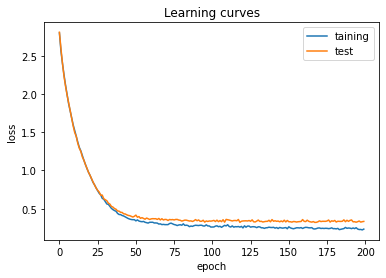

In [16]:
plt.plot(history_4Au_X1.history['loss'], label='taining')
plt.plot(history_4Au_X1.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Learning curves')
plt.legend(loc='upper right')
plt.show()

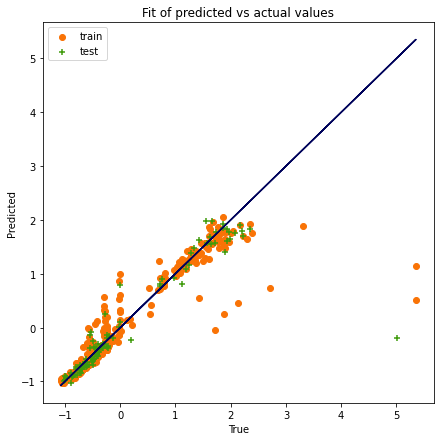

In [17]:
pred_4Au_test = ANN_4Au_X1.predict(X_4Au_test)
pred_4Au_train = ANN_4Au_X1.predict(X_4Au_train)

plt.figure(figsize=(7, 7))

plt.scatter(y_4Au_train, pred_4Au_train, marker="o",color='#f97306',label='train')
plt.scatter(y_4Au_test, pred_4Au_test, marker="+",color='#3f9b0b',label='test')
plt.legend(loc='upper left')
plt.plot(y_4Au_train, y_4Au_train,color='#00035b')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Fit of predicted vs actual values')
plt.show()

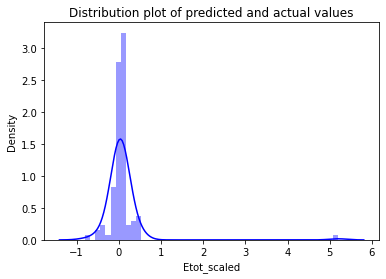

In [18]:
sns.distplot(y_4Au_test-pred_4Au_test,color='blue')
plt.title('Distribution plot of predicted and actual values')
plt.xlabel('Etot_scaled');

In [19]:
print('MAE:', metrics.mean_absolute_error(y_4Au_test, pred_4Au_test))
print('MSE:', metrics.mean_squared_error(y_4Au_test, pred_4Au_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_4Au_test, pred_4Au_test)))
print('R_squared:'+ str(round(r2_score(y_4Au_test,pred_4Au_test),2)))

MAE: 0.17113192951117948
MSE: 0.27831104203531726
RMSE: 0.5275519330220649
R_squared:0.77
